# Charting Boulder: Aging population
[Brian C. Keegan, Ph.D.](http://www.brianckeegan.com)  
October 2025

Released under a [MIT License](https://opensource.org/licenses/MIT).

## Load libraries

In [58]:
import pandas as pd
import numpy as np
import scipy as sp

pd.options.display.max_columns = 100

%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors

Define grades.

In [200]:
grade_names = ['Pre-K','K','1','2','3','4','5','6','7','8','9','10','11','12']

grade_transitions = [f"{grade_names[i]} to {grade_names[i+1]}" for i in range(len(grade_names)-1)]

## Load data

### Enrollment data
This data was adapted and standardized from these data sources:

* 2023 - present: https://www.cde.state.co.us/cdereval/pupilcurrent (Excel)
* 2000 - 2022: https://spl.cde.state.co.us/artemis/edserials/ed59017internet/ (PDFs and Excel)
* 1986 - 1999: https://spl.cde.state.co.us/artemis/edserials/ed27919internet/ (PDFs)

The primary changes were:

1. Combining half-day and full-day kindergarten enrollments together (2000s and 2010s)
2. Excluding special education and college enrollment numbers (1980s and 1990s)


In [5]:
enrollments_df = pd.read_csv('enrollments.csv')
enrollments_df.head()

,Year,District,Pre-K,K,1,2,3,4,5,6,7,8,9,10,11,12,Total
0,2024,Boulder,770,1608,1593,1772,1892,1874,1956,2097,2168,2184,2430,2441,2500,2706,27991
1,2024,St. Vrain,1255,2079,2259,2273,2492,2360,2346,2316,2368,2365,2588,2564,2583,2566,32414
2,2023,Boulder,916,1546,1712,1826,1822,1943,1978,2121,2129,2161,2406,2499,2540,2763,28362
3,2023,St. Vrain,1280,2210,2232,2442,2308,2320,2283,2309,2348,2479,2558,2598,2578,2561,32506
4,2022,Boulder,808,1662,1782,1788,1897,1940,2023,2081,2103,2149,2459,2523,2625,2647,28487


I have tried to correct errors introduced from the optical character recognition that converted the PDFs to this tabular format, but other errors may be present. 

These differences below between the reported totals and summing up all the grades are small and a result of dropping the special education and undergraduate programs in the 1980s and early 1990s.

In [22]:
enrollments_df['Calculated'] = enrollments_df[grade_names].sum(1)

enrollments_df['Diff'] = enrollments_df['Total'] - enrollments_df['Calculated']

enrollments_df.sort_values('Diff',ascending=False).head(20)

,Year,District,Pre-K,K,1,2,3,4,5,6,7,8,9,10,11,12,Total,Calculated,Diff
73,1988,St. Vrain,175,1261,1373,1240,1142,1158,1058,1076,1005,1086,986,1048,1005,1025,14959,14638,321
75,1987,St. Vrain,322,1312,1304,1173,1155,1066,1060,975,1103,1002,1085,1052,1071,1083,15081,14763,318
71,1989,St. Vrain,173,1209,1283,1322,1220,1155,1157,1059,1092,981,1084,969,994,965,14929,14663,266
69,1990,St. Vrain,161,1225,1267,1248,1330,1209,1174,1145,1100,1068,996,1046,916,926,15070,14811,259
67,1991,St. Vrain,233,1288,1319,1263,1264,1324,1244,1192,1217,1064,1105,963,1054,865,15651,15395,256
63,1993,St. Vrain,159,1227,1341,1341,1335,1318,1295,1331,1310,1204,1197,1070,954,866,16192,15948,244
65,1992,St. Vrain,236,1267,1359,1329,1305,1301,1342,1283,1245,1181,1095,1055,946,957,16099,15901,198
76,1986,Boulder,6,1631,1641,1589,1497,1423,1425,1414,1404,1469,1693,1801,1869,1694,20751,20556,195
77,1986,St. Vrain,307,1215,1260,1175,1074,1052,990,1074,1020,1082,1105,1154,1155,1044,14896,14707,189
61,1994,St. Vrain,0,1259,1316,1355,1373,1352,1307,1314,1376,1328,1225,1184,1016,909,16482,16314,168


### Annual population data

Load annual municipal and county population estimates.

In [26]:
county_muni_df = pd.read_csv('county-muni-timeseries.csv')

# Clean
county_muni_df['municipalityname'] = county_muni_df['municipalityname'].str.strip()

# Filter to Boulder County and city of Boulder
county_muni_county_pop_s = county_muni_df.loc[county_muni_df['municipalityname'] == 'BOULDER COUNTY',['year','totalpopulation']].set_index('year')['totalpopulation']
county_muni_city_pop_s = county_muni_df.loc[county_muni_df['municipalityname'] == 'Boulder',['year','totalpopulation']].set_index('year')['totalpopulation']

# Inspect
county_muni_df.head()

,id,countyfips,placefips,municipalityname,year,totalpopulation,countyplace
0,1,0,0,COLORADO STATE,1980,2889735.0,0
1,2,1,0,ADAMS COUNTY,1980,245944.0,100000
2,3,1,3455,Arvada (part),1980,1229.0,103455
3,4,1,4000,Aurora (part),1980,29193.0,104000
4,5,1,6090,Bennett (part),1980,942.0,106090


### Population forecasts

Load single-year county population age estimates for 1990 through 2050.

In [46]:
sya_df = pd.read_csv('sya-county.csv',header=1)

sya_boulder_df = sya_df.copy()[sya_df['county'] == 'Boulder']

sya_boulder_df.head()

,id,countyfips,year,age,county,malepopulation,femalepopulation,totalpopulation,datatype
546,33307,13,1990,0,Boulder,1597,1630,3227,Estimate
547,33308,13,1990,1,Boulder,1583,1581,3164,Estimate
548,33309,13,1990,2,Boulder,1593,1564,3157,Estimate
549,33310,13,1990,3,Boulder,1631,1530,3161,Estimate
550,33311,13,1990,4,Boulder,1696,1594,3290,Estimate


## Plotting

### Total enrollments over time

<Axes: xlabel='Year', ylabel='Total'>

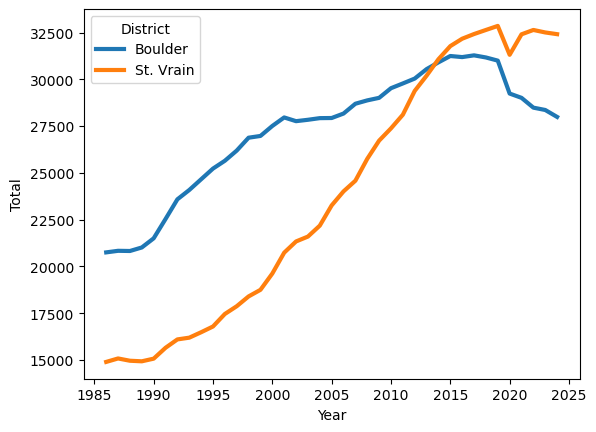

In [17]:
sb.lineplot(
    data = enrollments_df,
    x = 'Year',
    y = 'Total',
    hue = 'District',
    palette = 'tab10',
    linewidth = 3
)

### Enrollments v. population

Join county population data with enrollment data.

In [63]:
enrollments_pop_df = enrollments_df.set_index(['Year','District'])['Total'].unstack(1)
enrollments_pop_df['Population'] = county_muni_county_pop_s

enrollments_pop_df.head()

District,Boulder,St. Vrain,Population
Year,,,
1986,20751,14896,211841.0
1987,20835,15081,214222.0
1988,20825,14959,218380.0
1989,21013,14929,222354.0
1990,21502,15070,225339.0


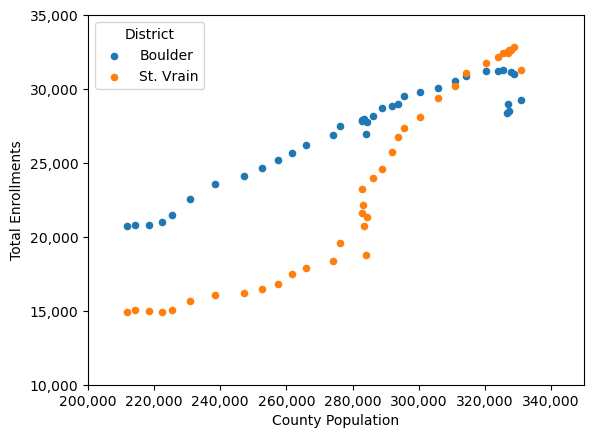

In [42]:
f,ax = plt.subplots()

enrollments_pop_df.plot.scatter(x='Population',y='Boulder',label='Boulder',ax=ax,color='tab:blue')
enrollments_pop_df.plot.scatter(x='Population',y='St. Vrain',label='St. Vrain',ax=ax,color='tab:orange')

ax.set_xlabel('County Population')
ax.set_ylabel('Total Enrollments')

ax.set_xlim((200000,350000))
ax.set_ylim((10000,35000))

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

### Enrollments vs. K12 population

In [59]:
enrollments_pop_df.reindex(range(1986,2051))

District,Boulder,St. Vrain,Population,K12 Population
Year,,,,
1986,20751.0,14896.0,211841.0,NaN
1987,20835.0,15081.0,214222.0,NaN
1988,20825.0,14959.0,218380.0,NaN
1989,21013.0,14929.0,222354.0,NaN
1990,21502.0,15070.0,225339.0,40287.0
...,...,...,...,...
2046,NaN,NaN,NaN,NaN
2047,NaN,NaN,NaN,NaN
2048,NaN,NaN,NaN,NaN


In [64]:
c0 = sya_boulder_df['age'] > 4
c1 = sya_boulder_df['age'] < 19

sya_boulder_k12_df = sya_boulder_df.copy()[c0 & c1]

boulder_k12_df = sya_boulder_k12_df.groupby('year').agg({'totalpopulation':'sum'})['totalpopulation']

enrollments_pop_df['K12 Population'] = boulder_k12_df

enrollments_pop_df[['Boulder','St. Vrain','K12 Population']].to_clipboard()

enrollments_pop_df.head()

District,Boulder,St. Vrain,Population,K12 Population
Year,,,,
1986,20751,14896,211841.0,NaN
1987,20835,15081,214222.0,NaN
1988,20825,14959,218380.0,NaN
1989,21013,14929,222354.0,NaN
1990,21502,15070,225339.0,40287.0


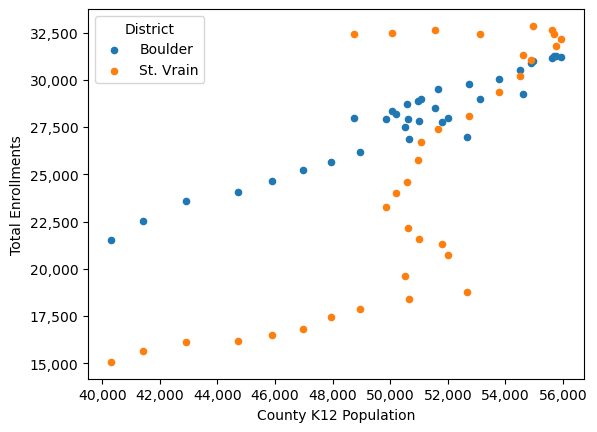

In [55]:
f,ax = plt.subplots()

enrollments_pop_df.plot.scatter(x='K12 Population',y='Boulder',label='Boulder',ax=ax,color='tab:blue')
enrollments_pop_df.plot.scatter(x='K12 Population',y='St. Vrain',label='St. Vrain',ax=ax,color='tab:orange')

ax.set_xlabel('County K12 Population')
ax.set_ylabel('Total Enrollments')

# ax.set_xlim((200000,350000))
# ax.set_ylim((10000,35000))

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

### Forecast enrollments

Estimate a linear regression model of BVSD enrollments as a function of K12 population.

In [67]:
reg_model = sp.stats.linregress(
    x = enrollments_pop_df.loc[1990:2024,'K12 Population'],
    y = enrollments_pop_df.loc[1990:2024,'Boulder']
)

reg_model

LinregressResult(slope=np.float64(0.6096161727071039), intercept=np.float64(-2943.2270442748377), rvalue=np.float64(0.9604542085648698), pvalue=np.float64(6.790782867322881e-20), stderr=np.float64(0.030764604287954415), intercept_stderr=np.float64(1564.4428355936243))

Use the model parameters to forecast enrollments through 2050.

In [91]:
enrollments_forecast_df = enrollments_pop_df.reindex(range(1990,2051))

enrollments_forecast_df['K12 Population'] = boulder_k12_df

enrollments_forecast_df['Boulder Estimate'] = reg_model.slope * enrollments_forecast_df['K12 Population'] + reg_model.intercept

enrollments_forecast_df[['Boulder','Boulder Estimate']].to_clipboard()

enrollments_forecast_df.tail()

District,Boulder,St. Vrain,Population,K12 Population,Boulder Estimate
Year,,,,,
2046,NaN,NaN,NaN,43992,23875.007625
2047,NaN,NaN,NaN,44159,23976.813526
2048,NaN,NaN,NaN,44268,24043.261689
2049,NaN,NaN,NaN,44316,24072.523265
2050,NaN,NaN,NaN,44294,24059.111710


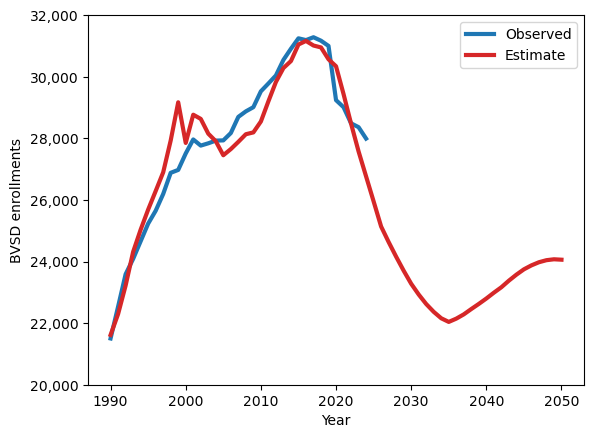

In [79]:
f,ax = plt.subplots()

enrollments_forecast_df['Boulder'].plot(label='Observed',color='tab:blue',ax=ax,lw=3)
enrollments_forecast_df['Boulder Estimate'].plot(label='Estimate',color='tab:red',ax=ax,lw=3)

ax.set_ylabel('BVSD enrollments')

ax.set_ylim((20000,32000))

# ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.legend()

f.savefig('enrollment_forecast.png')

### Cohort survival model

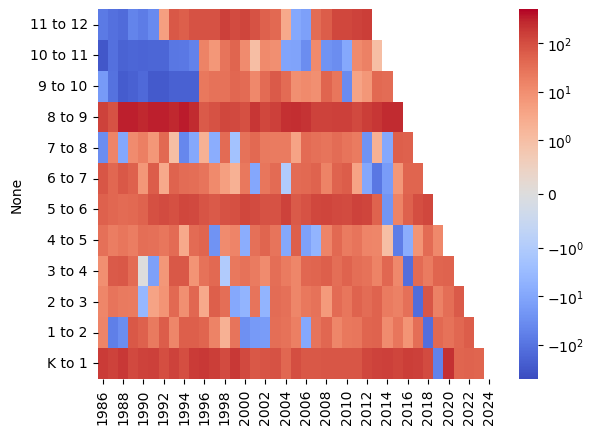

In [176]:
enrollments_matrix = enrollments_df.sort_values('Year',ascending=True).set_index('Year').query('District == "Boulder"').loc[:,grade_names[1:]]

cohort_survival_d = {}

for i,year in enumerate(enrollments_matrix.index):
    cohort_survival_d[year] = pd.Series(np.diff(np.diag(enrollments_matrix.to_numpy(),k=-i)))

cohort_survival_df = pd.concat(cohort_survival_d,axis=1).T
cohort_survival_df.columns = [transitions[1:]]

ax = sb.heatmap(
    cohort_survival_df.T,
    cmap = 'coolwarm',
    norm = mcolors.SymLogNorm(linthresh=1, vmin=-500, vmax=500)
)

ax.invert_yaxis()

In [208]:
datawrapper_df = cohort_survival_df.T.fillna(0)
datawrapper_df.loc['Transition',:] = np.nan
datawrapper_df.loc[['Transition']+grade_transitions[1:][::-1],:].to_clipboard()

<Axes: >

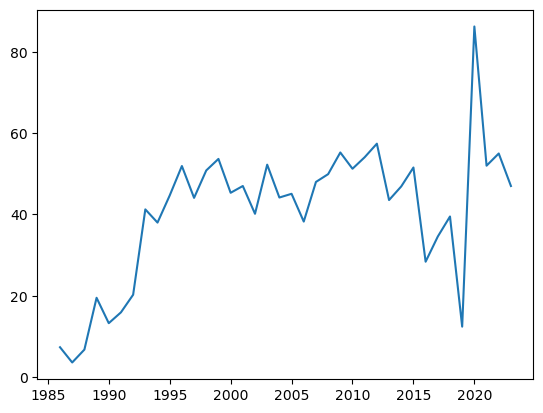

In [185]:
cohort_survival_df.mean(1).plot.line()

<Axes: >

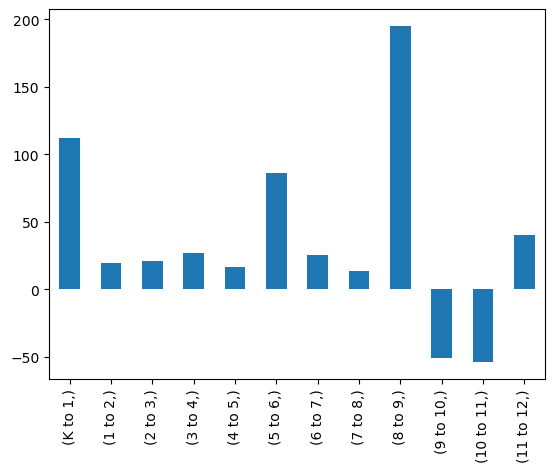

In [187]:
cohort_survival_df.mean(0).plot.bar()

In [138]:
len(grade_names[1:])

13

### K12 students per 65+

In [82]:
c2 = sya_boulder_df['age'] > 64

sya_boulder_over65_df = sya_boulder_df.copy()[c2]

boulder_over65_df = sya_boulder_over65_df.groupby('year').agg({'totalpopulation':'sum'})['totalpopulation']

boulder_over65_df.tail()

year
2046    87873
2047    88674
2048    89379
2049    90023
2050    90817
Name: totalpopulation, dtype: int64

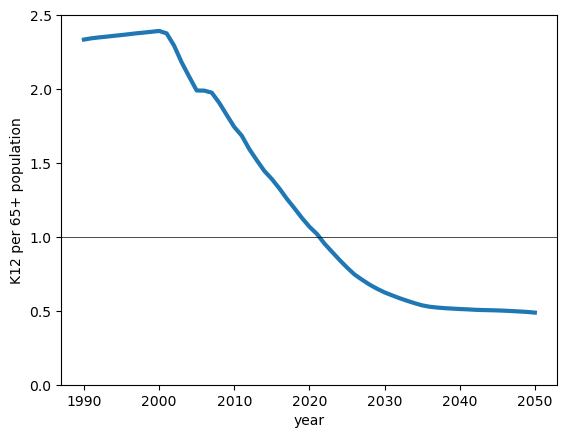

In [93]:
boulder_k12_o65_df = pd.DataFrame({'K12':boulder_k12_df,'Over-65':boulder_over65_df})
boulder_k12_o65_df['Ratio'] = boulder_k12_o65_df['K12'] / boulder_k12_o65_df['Over-65']

boulder_k12_o65_df['Ratio'].to_clipboard()

f,ax = plt.subplots()
boulder_k12_o65_df['Ratio'].plot(ax=ax,lw=3)
ax.set_ylim((0,2.5))
ax.set_ylabel('K12 per 65+ population')
ax.axhline(1,lw=.5,c='k')